# Multi-Armed Bandit

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
restaurants = []

restaurants.append(np.random.normal(loc=5, scale=0.5, size=100))
restaurants.append(np.random.normal(loc=5, scale=1.5, size=100))
restaurants.append(np.random.normal(loc=5, scale=2, size=100))

print('Mean', 'Min', 'Max')
print(restaurants[0].mean(), restaurants[0].min(), restaurants[0].max())
print(restaurants[1].mean(), restaurants[1].min(), restaurants[1].max())
print(restaurants[2].mean(), restaurants[2].min(), restaurants[2].max())

Mean Min Max
5.073636315053099 3.775924569643454 6.1352518512527565
5.146085475451074 1.745728188565228 8.919951399731124
5.10934176170231 -1.1703510351591113 10.829739258476689


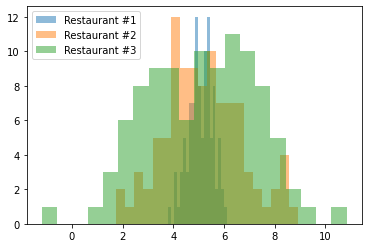

In [40]:
plt.hist(restaurants[0], bins=20, alpha=0.5, label="Restaurant #1")
plt.hist(restaurants[1], bins=20, alpha=0.5, label="Restaurant #2")
plt.hist(restaurants[2], bins=20, alpha=0.5, label="Restaurant #3")
plt.legend()
plt.show()

In [36]:
# randomly selecting an element from the population

np.random.choice(restaurants[0], 1)[0]

4.899511908414683

## Exploration

In [43]:
total_rewards = 0
selected_restaurants = [0, 0, 0]
for i in range(300):
    random_restaurant = np.random.choice(3, 1)[0]
    selected_restaurants[random_restaurant] += 1
    reward = np.random.choice(restaurants[random_restaurant], 1)[0]
    total_rewards += reward
    
print(f"Total Reward: {total_rewards:.2f}")
print(f"Selected Restaurants: {selected_restaurants}")

Total Reward: 1532.12
Selected Restaurants: [94, 109, 97]


## Exploitation

In [46]:
total_rewards = 0
initial_rewards = []
selected_restaurants = [0, 0, 0]

for i in range(3):
    selected_restaurants[i] += 1
    reward = np.random.choice(restaurants[i], 1)[0]
    initial_rewards.append(reward)
    total_rewards = reward

initial_rewards

[5.59942102068167, 6.4275976749824855, 1.311625968164484]

In [47]:
restaurant_max_reward = np.argmax(initial_rewards)
restaurant_max_reward

1

In [49]:
for i in range(297):
    selected_restaurants[restaurant_max_reward] += 1
    reward = np.random.choice(restaurants[restaurant_max_reward], 1)[0]
    total_rewards += reward

print(f"Total Reward: {total_rewards:.2f}")


Total Reward: 1546.80


## Epsilon-Greedy

In [59]:
epsilon = 0.2 # 20%
total_rewards = 0
visits_restaurants = [0, 0, 0]
mean_restaurants = [0, 0, 0]

explore_count = 0
exploite_count = 0

for i in range(300):
    
    steps = int(300 / (300 * epsilon))
    if (i + 1) % steps == 0:
        # explore
        restaurant = np.random.choice(3, 1)[0]
        explore_count += 1
    else:
        # exploite
        restaurant = np.argmax(mean_restaurants)
        exploite_count += 1
        
    reward = np.random.choice(restaurants[restaurant], 1)[0]
    total_rewards += reward
    
    # updating mean reward for the restaurant
    updated_mean = ((mean_restaurants[restaurant] * visits_restaurants[restaurant]) + reward) / (visits_restaurants[restaurant] + 1)
    mean_restaurants[restaurant] = updated_mean
    
    visits_restaurants[restaurant] += 1


print(explore_count, exploite_count)
print(f"Total Reward: {total_rewards:.2f}")
print(f"Visited Restaurants: {visits_restaurants}")

60 240
Total Reward: 1554.84
Visited Restaurants: [27, 207, 66]
